<a href="https://colab.research.google.com/github/rrohan1920/mk-labs-file/blob/main/ml9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Equation: Y = 1.2211 * X + -25.9442
Mean Squared Error (MSE): 208.9997


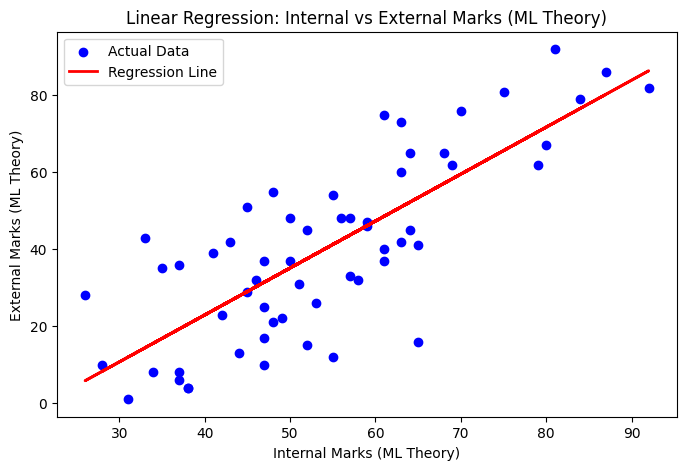

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('/content/Result-Experiment.xlsx')

# Display column names to identify correct indexes
# print("Column Names:", df.columns)

# Extract Internal and External marks under ML Theory
df = df.iloc[1:].reset_index(drop=True)  # Skip first row if it's a header row
df_cleaned = df.iloc[0:, [1, 2]].copy()

# Rename columns for simplicity
df_cleaned.columns = ["Internal", "External"]

# Convert data to numeric (handle errors)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop missing or invalid values
df_cleaned = df_cleaned.dropna()

# Ensure valid data exists
if df_cleaned.empty:
    print("Error: No valid numeric data found in selected columns.")
else:
    # Compute means of Internal and External marks
    mean_internal = df_cleaned["Internal"].mean()
    mean_external = df_cleaned["External"].mean()

    # Compute slope (m) and intercept (b)
    numerator = ((df_cleaned["Internal"] - mean_internal) * (df_cleaned["External"] - mean_external)).sum()
    denominator = ((df_cleaned["Internal"] - mean_internal) ** 2).sum()

    if denominator == 0:
        print("Error: All Internal Marks are identical, regression cannot be applied.")
    else:
        m = numerator / denominator
        b = mean_external - (m * mean_internal)

        # Predict External marks using the regression equation
        df_cleaned["Predicted External"] = (m * df_cleaned["Internal"]) + b

        # Compute Mean Squared Error (MSE)
        mse = ((df_cleaned["External"] - df_cleaned["Predicted External"]) ** 2).mean()

        # Print Regression Equation and Error
        print(f"Linear Regression Equation: Y = {m:.4f} * X + {b:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")

        # Plot the regression line
        plt.figure(figsize=(8, 5))
        plt.scatter(df_cleaned["Internal"], df_cleaned["External"], color='blue', label="Actual Data")
        plt.plot(df_cleaned["Internal"], df_cleaned["Predicted External"], color='red', linewidth=2, label="Regression Line")
        plt.xlabel("Internal Marks (ML Theory)")
        plt.ylabel("External Marks (ML Theory)")
        plt.title("Linear Regression: Internal vs External Marks (ML Theory)")
        plt.legend()
        plt.show()
